In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt
%matplotlib inline

In [211]:
# Read th csv file
csv_file = pd.read_csv('wandata.csv', header=0, index_col=False)

In [212]:
def handle_empty_strings(x):
    if type(x) == str:
        if len(x) == 0:
            value = np.nan
        else:
            value = float(x)
    else:
        value = x
    return value

In [213]:
for index, col in csv_file.iteritems():
    if index == "Time" or index == "Date":
        pass
    else:
        csv_file[index].replace(regex=True, inplace=True, to_replace=r'[^0-9.^0-9]', value=r'')
        csv_file[index] = csv_file[index].map(lambda x: handle_empty_strings(x))
        csv_file[index].astype(float)        

In [214]:
#Add Average Of all sites:
#csv_file["Average"] = csv_file.iloc[:, 2:].sum(axis=1)/(csv_file.shape[1] - 2)

In [215]:
# This seems to be time series data, set index of time
indexed = csv_file.set_index("Time")

/home/aurthur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


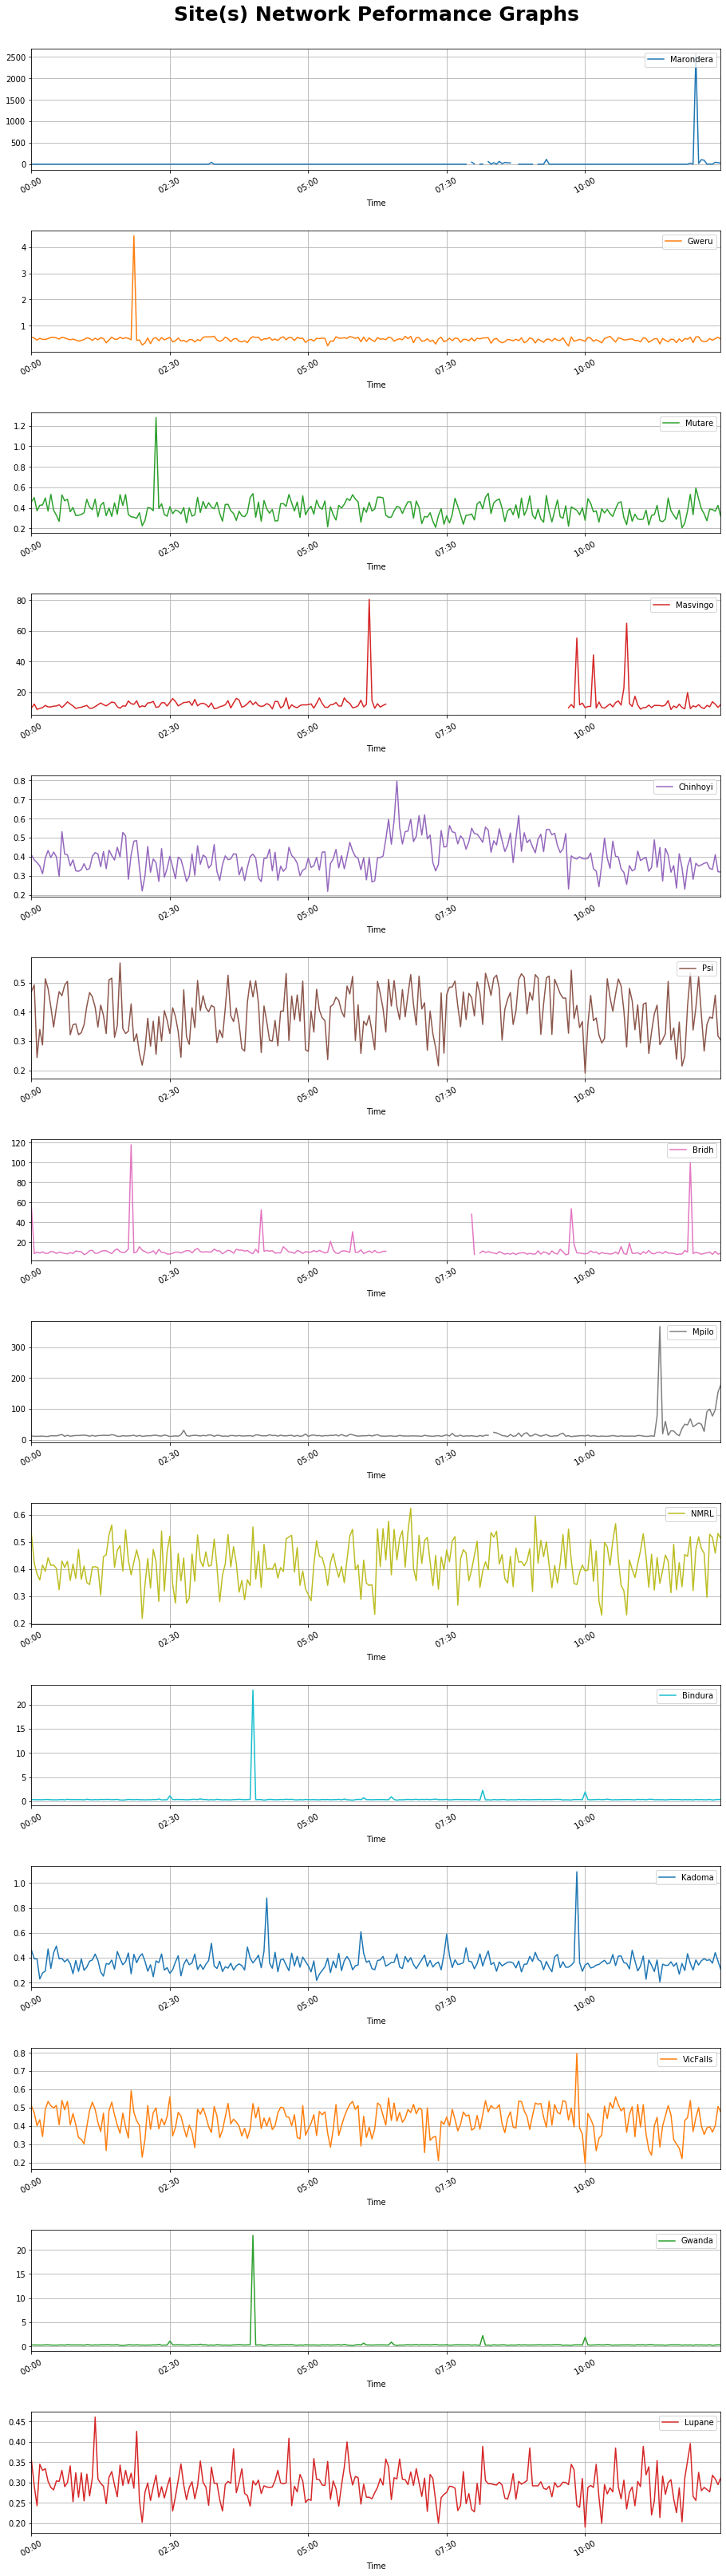

In [216]:
indexed.plot(
    linestyle='solid', 
    figsize=(15, 50), 
#     layout = (int(np.ceil((indexed.shape[1]-2))) + 1, 1),
    subplots=True, 
    sharex=False, 
    rot=30, 
    sort_columns=False, 
    grid=True, 
    legend=True, 
    stacked=False
)
[ax.legend(loc=1) for ax in plt.gcf().axes]
plt.tight_layout()
plt.suptitle('Site(s) Network Peformance Graphs', fontsize=25, fontweight="bold")
plt.subplots_adjust(hspace=0.5, top=0.965, bottom=0.1, right=0.9, left=0.1)
plt.savefig("WanData-Graphs-" + dt.now().strftime("%d-%m-%y") + ".pdf", papertype="a4", format="pdf", dpi=1500)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/aurthur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


<Figure size 432x288 with 0 Axes>

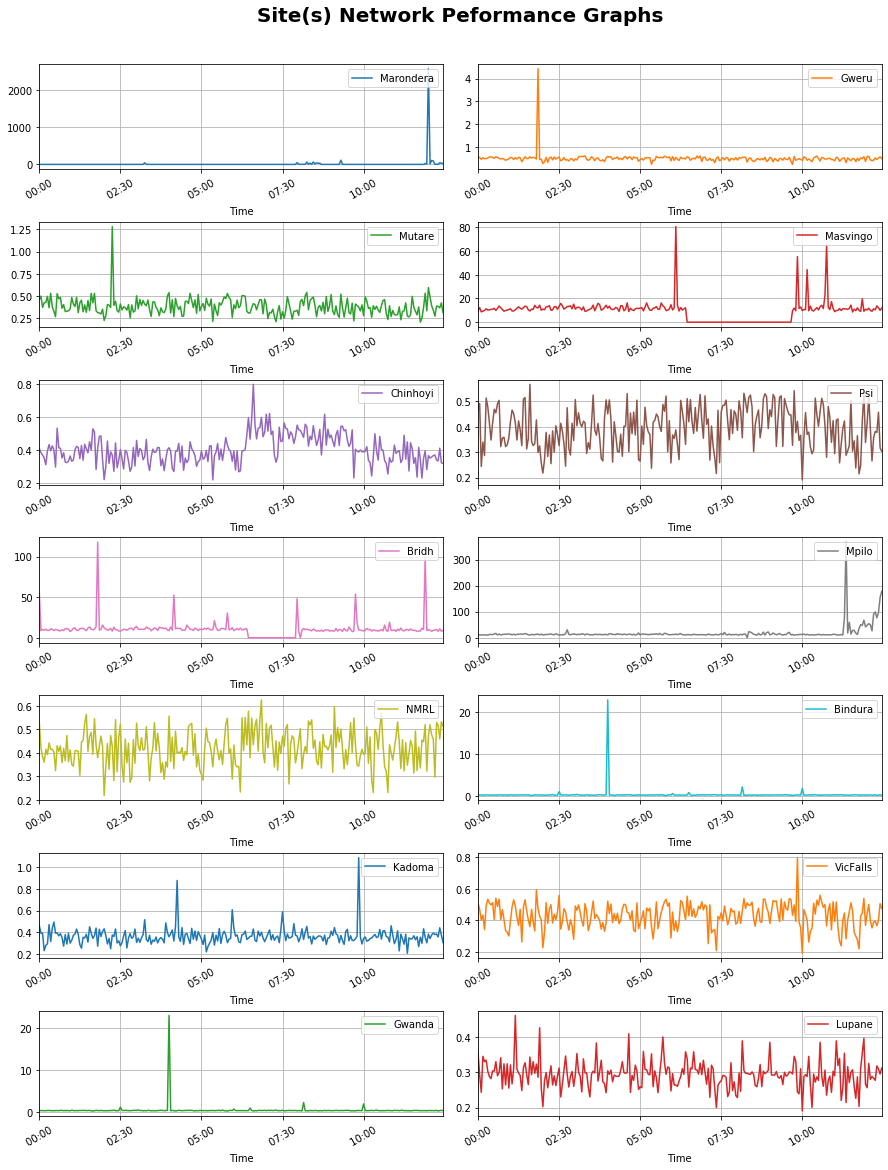

In [217]:
plt.figure()
indexed.plot(
    linestyle='solid', 
    figsize=(13, 20), 
    layout = (int(np.ceil((indexed.shape[1]-2)/2)) + 1, 2),
    subplots=True, 
    sharex=False, 
    sharey=False,
    rot=30, 
    sort_columns=False, 
    fontsize = 10,
    grid=True, 
    legend=True, 
    stacked=True
)
[ax.legend(loc=1) for ax in plt.gcf().axes]
plt.tight_layout()
plt.suptitle('Site(s) Network Peformance Graphs', fontsize=20, fontweight="bold")
plt.subplots_adjust(hspace=0.5, top=0.94, bottom=0.1, right=0.95, left=0.05)
plt.savefig("Wan-Data-Graphs-" + dt.now().strftime("%d-%m-%y") + ".pdf", papertype="a4", format="pdf", dpi=1500)